<a href="https://colab.research.google.com/github/navjotsingh151/Sensor-TimeSeriesAnalysis/blob/master/TimeSeriesAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Time Series analysis
Data  is collected from sensor A at **3 seconds interval** i.e. 480 cycles per day. Data is gathered for a week time frame 

# Data Cleaning

In [1]:
!pip install plotly==4.8.1
!pip install chart_studio


     |████████████████████████████████| 11.5MB 36.7MB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1
     |████████████████████████████████| 71kB 7.5MB/s 


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, plot, iplot

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
data_a = pd.read_csv("https://raw.githubusercontent.com/navjotsingh151/Sensor-TimeSeriesAnalysis/master/Data/Data_A.csv")
data_a.head()
data_a.rename(columns={"Timestamp ":"Timestamp"}, inplace=True)

In [4]:
data_a = data_a.sort_values(["Timestamp"], ascending = (True))
data_a.reset_index(inplace=True)
data_a.drop('index', axis = 1, inplace = True)
data_a.head()

,Date,Timestamp,Value
0,18-May,20200518451,25340
1,18-May,20200518452,25361
2,18-May,20200518453,25365
3,18-May,20200518454,25368
4,18-May,20200518455,25356


In [5]:

data_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3412 entries, 0 to 3411
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       3412 non-null   object
 1   Timestamp  3412 non-null   int64 
 2   Value      3412 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 80.1+ KB


In [6]:
data_a['year']= data_a.Timestamp.apply(lambda x : int(str(x)[:4]))
data_a['month']= data_a.Timestamp.apply(lambda x : int(str(x)[4:6]))
data_a['day']= data_a.Timestamp.apply(lambda x : int(str(x)[6:8]))
data_a.head()

,Date,Timestamp,Value,year,month,day
0,18-May,20200518451,25340,2020,5,18
1,18-May,20200518452,25361,2020,5,18
2,18-May,20200518453,25365,2020,5,18
3,18-May,20200518454,25368,2020,5,18
4,18-May,20200518455,25356,2020,5,18


In [7]:
#Adding time part for 8 days

# i = pd.date_range('2020-05-18', periods=480, freq='3S')
# s = pd.DataFrame(i)
data_timedf = pd.DataFrame()
dates = ['2020-05-19', '2020-05-20', '2020-05-21', '2020-05-22', '2020-05-23', '2020-05-24' , '2020-05-25' ]
for i in dates:
  series_ty = pd.date_range(i, periods=480, freq='3min')
  s = pd.DataFrame(series_ty, columns=['time'])
  data_timedf = pd.concat([data_timedf, s])

print(len(data_timedf))
data_timedf.head()


3360


,time
0,2020-05-19 00:00:00
1,2020-05-19 00:03:00
2,2020-05-19 00:06:00
3,2020-05-19 00:09:00
4,2020-05-19 00:12:00


In [8]:
# Time creation for 18- May
i = pd.date_range('2020-05-18', periods=480, freq='3min')
data_timedf_18 = pd.DataFrame(i, columns=['time'])
data_timedf_18 = data_timedf_18.sort_values(['time'], ascending= False)[:30]
data_timedf_18 = data_timedf_18.sort_values(['time'], ascending= True)
print(len(data_timedf_18))
data_timedf_18

# Time creation for 26 - May
i = pd.date_range('2020-05-26', periods=480, freq='3min')
data_timedf_26 = pd.DataFrame(i, columns=['time'])
data_timedf_26 = data_timedf_26.sort_values(['time'], ascending= True)[:22]
# data_timedf_26 = data_timedf_26.sort_values(['time'], ascending= True)[:22]
print(len(data_timedf_26))
data_timedf_26.head()



30
22


,time
0,2020-05-26 00:00:00
1,2020-05-26 00:03:00
2,2020-05-26 00:06:00
3,2020-05-26 00:09:00
4,2020-05-26 00:12:00


In [9]:
## Concatenate all time series 

data_timedf = pd.concat([data_timedf_18, data_timedf, data_timedf_26], axis = 0, sort=True)
data_timedf.sort_values('time', ascending=True)
data_timedf.reset_index(inplace=True)
data_timedf.drop('index', axis = 1, inplace= True)
data_timedf.head()

,time
0,2020-05-18 22:30:00
1,2020-05-18 22:33:00
2,2020-05-18 22:36:00
3,2020-05-18 22:39:00
4,2020-05-18 22:42:00


In [10]:
# Making the complete dataset
data_a = pd.concat([data_a, data_timedf], axis = 1)
data_a.head()

,Date,Timestamp,Value,year,month,day,time
0,18-May,20200518451,25340,2020,5,18,2020-05-18 22:30:00
1,18-May,20200518452,25361,2020,5,18,2020-05-18 22:33:00
2,18-May,20200518453,25365,2020,5,18,2020-05-18 22:36:00
3,18-May,20200518454,25368,2020,5,18,2020-05-18 22:39:00
4,18-May,20200518455,25356,2020,5,18,2020-05-18 22:42:00


In [0]:
data_a.drop(['Date', 'year', 'month', 'day'], axis = 1, inplace = True)
data_a['Value'].astype(int)
data_a.to_csv("data_input.csv", index = False)

# EDA


In [0]:
!pip install auto_ts

In [13]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime
import auto_ts as AT 
import pandas as pd
pd.options.plotting.backend = "plotly"

mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['axes.grid'] = False


Running Auto Timeseries version: 0.0.19...Call by using:
        auto_ts.Auto_Timeseries(traindata, ts_column,
                            target, sep,  score_type='rmse', forecast_period=5,
                            time_interval='Month', non_seasonal_pdq=None, seasonality=False,
                            seasonal_period=12, seasonal_PDQ=None, model_type='stats',
                            verbose=1)
    To run three models from Stats, ML and FB Prophet, set model_type='best'
To remove previous versions, perform 'pip uninstall auto_ts'
To get the latest version, perform "pip install auto_ts --no-cache-dir --ignore-installed"


In [37]:
data = pd.read_csv("/content/data_input.csv")
data.drop('Timestamp', axis = 1, inplace = True)
data['time']= pd.to_datetime(data['time']) 
print(data.head())
print(data.info())

   Value                time
0  25340 2020-05-18 22:30:00
1  25361 2020-05-18 22:33:00
2  25365 2020-05-18 22:36:00
3  25368 2020-05-18 22:39:00
4  25356 2020-05-18 22:42:00
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3412 entries, 0 to 3411
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Value   3412 non-null   int64         
 1   time    3412 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 53.4 KB
None


In [0]:
data_df = data.set_index('time')

In [16]:
data_df.plot()

In [17]:
data_final = data.copy()

train = data_final[:-50]
test = data_final[-50:]
print(train.shape, test.shape)
train.head()

(3362, 2) (50, 2)


,Value,time
0,25340,2020-05-18 22:30:00
1,25361,2020-05-18 22:33:00
2,25365,2020-05-18 22:36:00
3,25368,2020-05-18 22:39:00
4,25356,2020-05-18 22:42:00


# Time Series Analysis

In [0]:
ts_column = 'time'
sep = ','
target = 'Value'

Input is data frame. Performing Time Series Analysis
    Dataframe loaded successfully. Shape of data set = (3412, 1)
    Target variable = Value
Time Interval is given as H

Running Facebook Prophet Model...
Preparing Time Series data for FB Prophet: sample row before
                      Value
time                      
2020-05-18 22:30:00  25340
Time Series data: sample row after transformation
                    ds      y
0 2020-05-18 22:30:00  25340
    Fit-Predict data (shape=(3412, 2)) with Confidence Interval = 0.95...


INFO:numexpr.utils:NumExpr defaulting to 2 threads.


Building Forecast dataframe. Forecast Period = 100


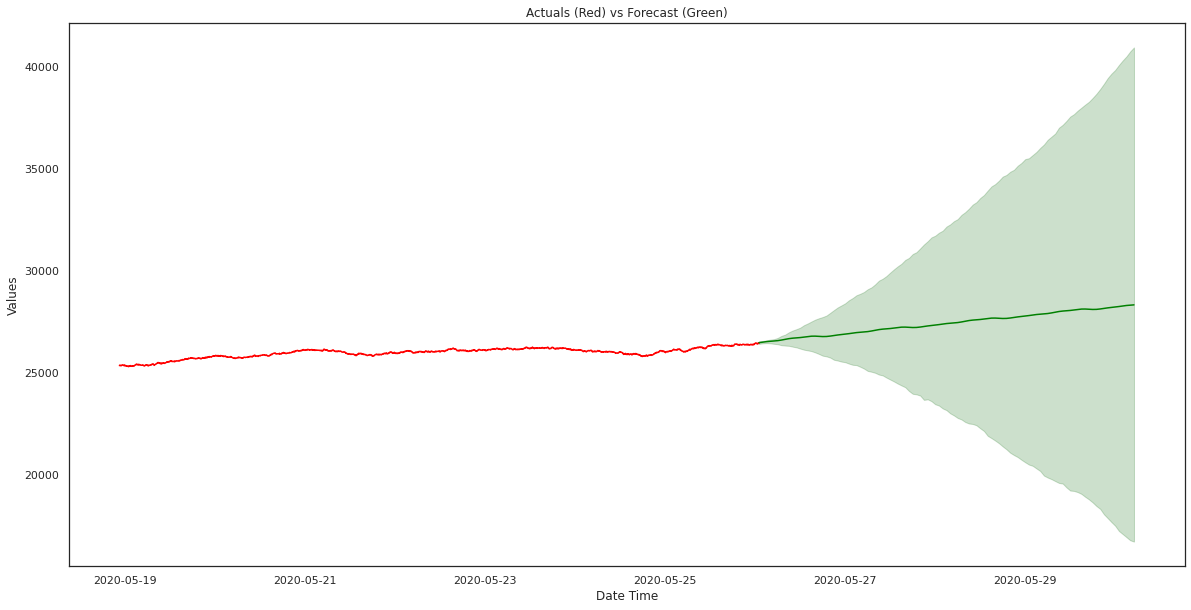

    RMSE = 37.43
    Std Deviation of Originals = 245.79
    Normalized RMSE = 15%

Running PyFlux Model...
Cycling through various (p,d,q) parameters

Best Params Selected (based on rmse): (3, 1, 3)
Dynamic 100-period Forecasts:
    RMSE = 28.33
    Std Deviation of Originals = 238.64
    Normalized RMSE = 12%

Running Non Seasonal ARIMA Model...

Differencing = 0
 Iteration 0 completed...
 Iteration 10 completed...
    Best AR order p = 1, MA order q = 1, Interim metric = 24083.386

Differencing = 1
    Best AR order p = 0, MA order q = 0, Interim metric = 24056.215

Best model is: Non Seasonal ARIMA(0,1,0), aic = 24056.215
####    Fitting best model for full data set now. Will take time... ######
Static Forecasts:
Dynamic predictions erroring but continuing...

Dynamic 100-period Forecasts:
                             ARIMA Model Results                              
Dep. Variable:                D.Value   No. Observations:                 3311
Model:                 ARIMA(0, 1, 0)

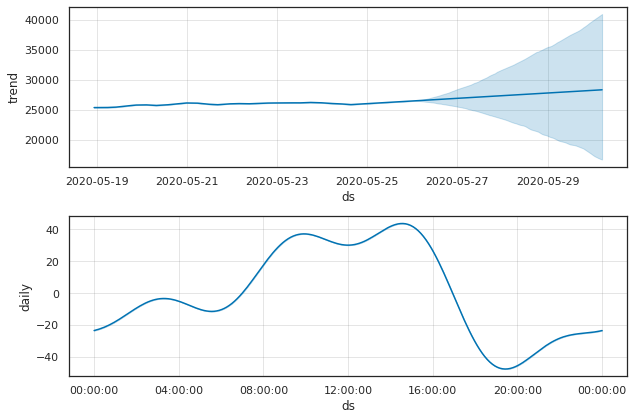

In [19]:
ml_dict = AT.Auto_Timeseries(data, ts_column, target, sep, score_type='rmse', 
                             forecast_period=100, time_interval='H', seasonality=True, seasonal_period= 480,
                             non_seasonal_pdq=None,  seasonal_PDQ=None, model_type='best', verbose = 2)

In [28]:
# BestModel
# forecast_val = ml_dict
forecast_val = ml_dict['ARIMA']['forecast']['mean'].values
forecast_val

array([26383.315010570823, 26383.630021141646, 26383.94503171247,
       26384.26004228329, 26384.575052854114, 26384.890063424937,
       26385.20507399576, 26385.520084566582, 26385.835095137405,
       26386.150105708228, 26386.46511627905, 26386.780126849873,
       26387.095137420696, 26387.41014799152, 26387.72515856234,
       26388.040169133164, 26388.355179703987, 26388.67019027481,
       26388.985200845633, 26389.300211416456, 26389.61522198728,
       26389.9302325581, 26390.245243128924, 26390.560253699747,
       26390.87526427057, 26391.190274841392, 26391.505285412215,
       26391.820295983038, 26392.13530655386, 26392.450317124683,
       26392.765327695506, 26393.08033826633, 26393.39534883715,
       26393.710359407974, 26394.025369978797, 26394.34038054962,
       26394.655391120443, 26394.970401691266, 26395.28541226209,
       26395.60042283291, 26395.915433403734, 26396.230443974557,
       26396.54545454538, 26396.860465116202, 26397.175475687025,
       26397.

In [111]:
forecast_val = ml_dict['FB_Prophet']['forecast']
forecast_val

array([25337.01551902, 25337.1283695 , 25337.23143075, ...,
       28287.08416452, 28303.84191331, 28317.20478109])

In [29]:
i = pd.date_range('2020-05-26', periods=480, freq='3min')
data_timedf_26 = pd.DataFrame(i, columns=['time'])
data_timedf_26 = data_timedf_26.sort_values(['time'], ascending= True)[22:122]
# data_timedf_26 = data_timedf_26.sort_values(['time'], ascending= True)[:22]
print(len(data_timedf_26))
data_timedf_26.reset_index(inplace = True)
data_timedf_26.drop('index', inplace = True, axis = 1)

100


In [0]:

t = np.array(data_timedf_26['time'].values)
list_n = []
for i in range(0, 100):
  list_n.append([t[i], forecast_val[i]])

data_predicted = pd.DataFrame(list_n, columns=['time', 'Value'])
# data_predicted  = pd.DataFrame([t, forecast_val], columns = ['time', 'Value']) 

In [31]:
data_predicted.plot(x = 'time', y = 'Value')

In [38]:
data_1 = data.copy()

trace_1 = go.Scatter(
        x=data_1.time,
        y= data_1['Value'],
        name = 'Actual Reading',
        line = dict(color = '#29f3c9'),
        opacity = 0.8)

trace_2 = go.Scatter(
        x=data_predicted.time,
        y= data_predicted['Value'],
        name = 'Forecasting',
        line = dict(color = '#f4aaa8'),
        opacity = 0.8)
data_v = [trace_1, trace_2]
# data = [trace_1]
layout = dict(
        title='Time series for Actual and Forecasting Value ',
        xaxis_title='Time(sec)',
        yaxis_title='Accel norm',
        paper_bgcolor="#dec7f2",
#         paper_bgcolor='rgba(0,1,0,0)'
        )
fig = dict(data=data_v, layout= layout )
iplot(fig)

In [0]:
data_output = pd.concat([data, data_predicted], axis = 0)
data_output.tail()
data_output[['time', 'Value']].to_csv("data_output_forecast_100.csv", index = False)

# Prediction using SVR

In [0]:
import pandas as pd
from sklearn.svm import SVR 
from sklearn.model_selection import GridSearchCV

In [84]:
data_p = pd.read_csv("/content/data_input.csv")
data_p.head()

,Timestamp,Value,time
0,20200518451,25340,2020-05-18 22:30:00
1,20200518452,25361,2020-05-18 22:33:00
2,20200518453,25365,2020-05-18 22:36:00
3,20200518454,25368,2020-05-18 22:39:00
4,20200518455,25356,2020-05-18 22:42:00


In [93]:
column_split = 15 
cnt = 0 
list_s = []
list_l = []

# Creating a splitted file
for ind, val in enumerate(data_p['Value']):
  if (ind+1) % column_split == 0:
    list_s.append(val)
    list_l.append(list_s)
    list_s = []
  else:
    list_s.append(val)
list_l.append(list_s)

col_name = []
for i in range(1, column_split+1):
  col_name.append('C'+str(i))
print(col_name)

data_trans = pd.DataFrame(list_l, columns=col_name)
data_trans.head()
data_trans.to_csv("data_transposed_input_15_split.csv", index = False)

# DRop Nan
data_trans.dropna(inplace = True)

['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15']


In [94]:
y = data_trans['C15']
X = data_trans.drop('C15', axis = 1)
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = SVR()
clf = GridSearchCV(svc, parameters)
clf.fit(X, y)


sorted(clf.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_C',
 'param_kernel',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 101, test_size = 0.2)


In [106]:
from sklearn.model_selection import cross_val_score

parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = SVR()
clf = GridSearchCV(svc, parameters,cv=5)
clf.fit(X_train, y_train)
# scores
clf.best_params_

{'C': 10}

In [111]:
clf = SVR(kernel='rbf', C=10)
scores = cross_val_score(clf, X_train, y_train, cv=5)
clf.fit(X_train, y_train)

SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [0]:
# Saving model
import pickle as pkl
filename = 'finalized_model.sav'

if 1 == 2 :
  pkl.dump(clf, open(filename, 'wb'))
else:
  clf = pkl.load(open(filename, 'rb'))

In [127]:
pred = clf.predict(X_test)
pred

array([26107.59927396, 25918.43535936, 25833.26807659, 25963.52283457,
       25818.3013345 , 26037.17385174, 25807.8659192 , 26179.21298487,
       26105.10007658, 26109.0167271 , 26114.99111042, 25823.27560129,
       25931.36118678, 26004.9619518 , 26157.16649816, 25745.01524778,
       26031.96048849, 25926.16131753, 26058.44562876, 26171.39201149,
       26173.33818048, 26021.14453061, 26119.68154545, 25828.44175697,
       26009.45063529, 25746.8975801 , 26170.71515449, 25839.30701584,
       25834.05976539, 26098.71453585, 26017.80322344, 25779.92181676,
       25978.25718473, 26118.29535631, 26165.09069198, 25978.50880348,
       26083.17898872, 25856.26424517, 25694.26274309, 26035.6194241 ,
       26033.18312212, 26177.01718871, 26013.70257806, 25748.71444648,
       26026.79140437, 25867.9169425 ])

In [128]:
y_test.values

array([26092., 25940., 25793., 25938., 25819., 26049., 25789., 26389.,
       26057., 26137., 26117., 25837., 25934., 26015., 26152., 25328.,
       26029., 25945., 26080., 26214., 26202., 26029., 26420., 25821.,
       26015., 25732., 26198., 25827., 25835., 26095., 26020., 25788.,
       25969., 26111., 26344., 26023., 26109., 25870., 25462., 26060.,
       26029., 26209., 26055., 25707., 26041., 25906.])

In [129]:
clf.intercept_, clf.support_vectors_

(array([25917.20179948]),
 array([[26215., 26206., 26213., ..., 26183., 26176., 26170.],
        [25346., 25344., 25342., ..., 25319., 25312., 25307.],
        [25415., 25416., 25408., ..., 25400., 25409., 25414.],
        ...,
        [25934., 25919., 25918., ..., 25924., 25916., 25906.],
        [25372., 25376., 25386., ..., 25402., 25410., 25415.],
        [25945., 25934., 25938., ..., 25962., 25961., 25957.]]))

In [130]:
#Evaluation
from sklearn.metrics import accuracy_score
np.sqrt(mean_squared_error(y_test, pred))

95.03788058910577

In [147]:
data_prediction = pd.DataFrame(y_test.values, columns = ['Actual'])
data_prediction1 = pd.DataFrame(pred, columns = ['Pred'])
data_prediction = pd.concat([data_prediction, data_prediction1], axis = 1)
data_prediction

,Actual,Pred
0,26092.0,26107.599274
1,25940.0,25918.435359
2,25793.0,25833.268077
3,25938.0,25963.522835
4,25819.0,25818.301335
5,26049.0,26037.173852
6,25789.0,25807.865919
7,26389.0,26179.212985
8,26057.0,26105.100077
9,26137.0,26109.016727


In [156]:
data_prediction['diff']= data_prediction['Actual' ]- data_prediction['Pred' ]
data_prediction['diff'].plot()
# plt.xlabel('Difference between actual and predicted')